In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import  MinMaxScaler , StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import mysql.connector as sql

In [2]:
# Data Gathering


In [3]:
mydb = sql.connect(host = 'localhost',
                   user = 'root',
                   passwd = '14920151', # use your PW
                   use_pure = True,
                    database='loan_data') # use your database
print(mydb)

In [4]:
mycursor = mydb.cursor()


In [5]:
mycursor.execute('show databases')
for db in mycursor:
    print(db)

('aditya',)
('db2',)
('information_schema',)
('loan_data',)
('myaditya',)
('mydatabase',)
('mysql',)
('new_schema',)
('performance_schema',)
('sql_hr',)
('sql_inventory',)
('sql_store',)
('sys',)
('velocity_new',)


In [6]:
mycursor.execute('select * from loan_data.simple_loan_data')
result = mycursor.fetchall()
for row in result:
    print(row)

('LP001002', 'Male', 'No', 0, 'Graduate', 'No', 5849, 0, '', 360, 1, 'Urban', 'Y')
('LP001003', 'Male', 'Yes', 1, 'Graduate', 'No', 4583, 1508, '128', 360, 1, 'Rural', 'N')
('LP001005', 'Male', 'Yes', 0, 'Graduate', 'Yes', 3000, 0, '66', 360, 1, 'Urban', 'Y')
('LP001006', 'Male', 'Yes', 0, 'Not Graduate', 'No', 2583, 2358, '120', 360, 1, 'Urban', 'Y')
('LP001008', 'Male', 'No', 0, 'Graduate', 'No', 6000, 0, '141', 360, 1, 'Urban', 'Y')
('LP001011', 'Male', 'Yes', 2, 'Graduate', 'Yes', 5417, 4196, '267', 360, 1, 'Urban', 'Y')
('LP001013', 'Male', 'Yes', 0, 'Not Graduate', 'No', 2333, 1516, '95', 360, 1, 'Urban', 'Y')
('LP001018', 'Male', 'Yes', 2, 'Graduate', 'No', 4006, 1526, '168', 360, 1, 'Urban', 'Y')
('LP001020', 'Male', 'Yes', 1, 'Graduate', 'No', 12841, 10968, '349', 360, 1, 'Semiurban', 'N')
('LP001024', 'Male', 'Yes', 2, 'Graduate', 'No', 3200, 700, '70', 360, 1, 'Urban', 'Y')
('LP001027', 'Male', 'Yes', 2, 'Graduate', '', 2500, 1840, '109', 360, 1, 'Urban', 'Y')
('LP001028', '

In [7]:
df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
559,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
560,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
561,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [8]:
mycursor.execute('DESCRIBE loan_data.simple_loan_data')
result1  = mycursor.fetchall()
print(result1)

[('Loan_ID', b'text', 'YES', '', None, ''), ('Gender', b'text', 'YES', '', None, ''), ('Married', b'text', 'YES', '', None, ''), ('Dependents', b'int', 'YES', '', None, ''), ('Education', b'text', 'YES', '', None, ''), ('Self_Employed', b'text', 'YES', '', None, ''), ('ApplicantIncome', b'int', 'YES', '', None, ''), ('CoapplicantIncome', b'int', 'YES', '', None, ''), ('LoanAmount', b'text', 'YES', '', None, ''), ('Loan_Amount_Term', b'int', 'YES', '', None, ''), ('Credit_History', b'int', 'YES', '', None, ''), ('Property_Area', b'text', 'YES', '', None, ''), ('Loan_Status', b'text', 'YES', '', None, '')]


In [9]:
[[1,2,3],[5,6,7],[8,9,10]]

[[1, 2, 3], [5, 6, 7], [8, 9, 10]]

In [10]:
column_list = []
for column in result1:
    column_list.append(column[0])
print(column_list)
    

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [11]:
df = pd.DataFrame(result,columns=column_list)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
559,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
560,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
561,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [12]:
df = pd.read_csv('simple_loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

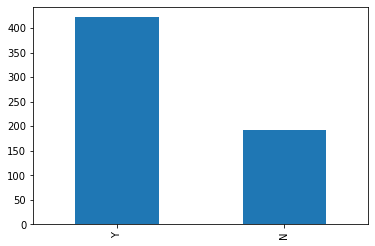

In [13]:
df['Loan_Status'].value_counts().plot.bar()

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
# df.dropna()

<AxesSubplot:>

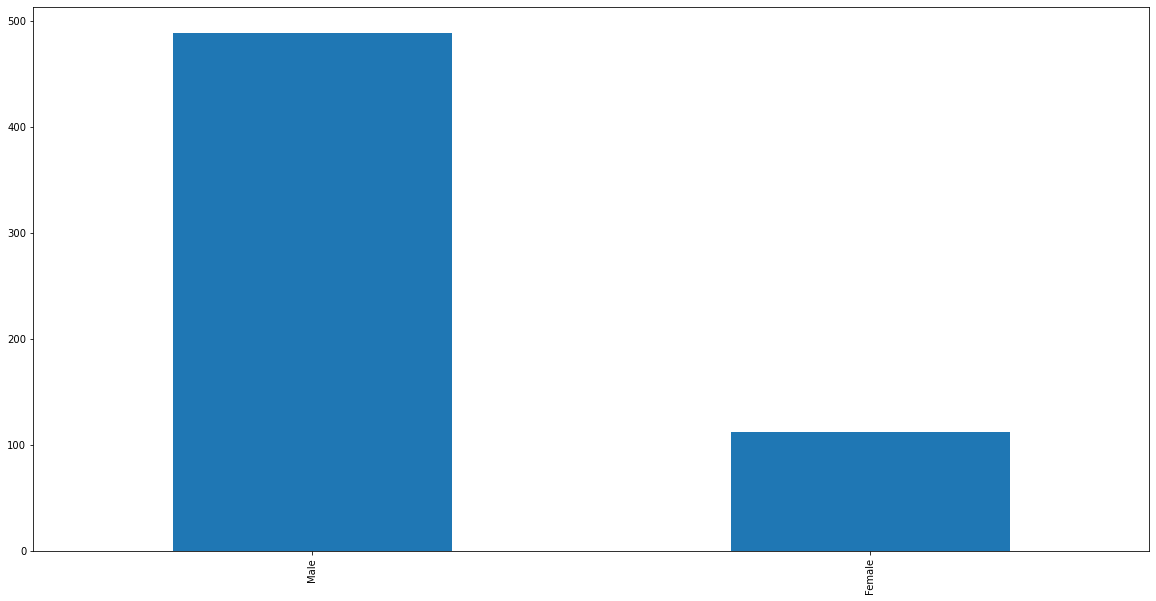

In [16]:
df['Gender'].value_counts().plot.bar(figsize=(20,10))

<AxesSubplot:title={'center':'Gender'}>

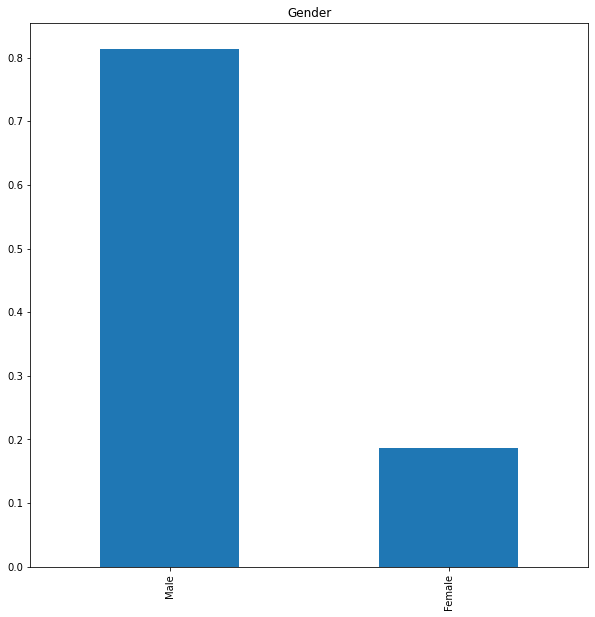

In [17]:
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title='Gender')

<AxesSubplot:>

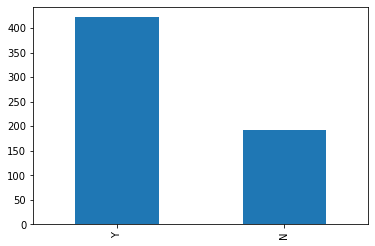

In [18]:
df['Loan_Status'].value_counts().plot.bar()

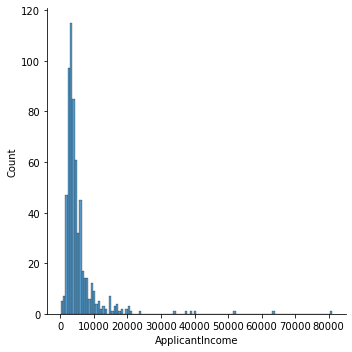

In [19]:
import seaborn as sns
sns.displot(df['ApplicantIncome'])
plt.show()

<AxesSubplot:>

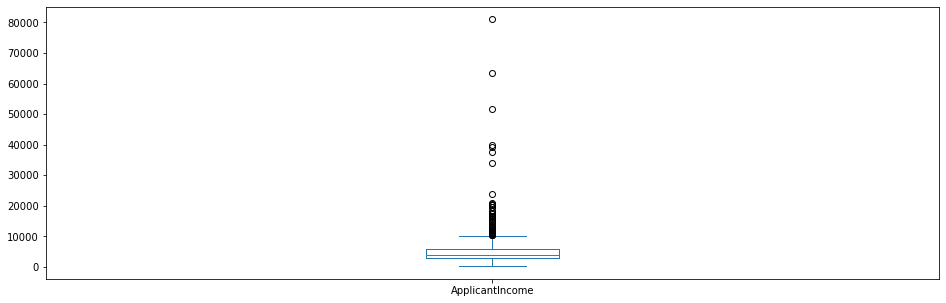

In [20]:
df['ApplicantIncome'].plot.box(figsize = (16,5))

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

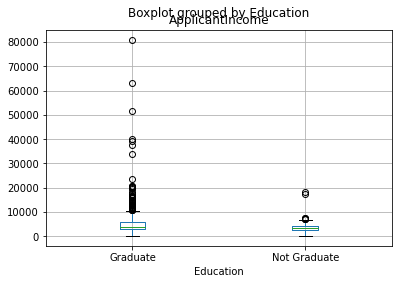

In [21]:
df.boxplot(column='ApplicantIncome',by = 'Education')


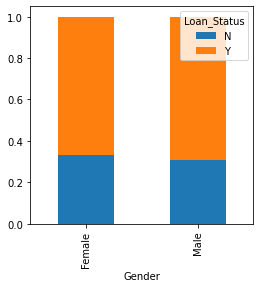

In [22]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

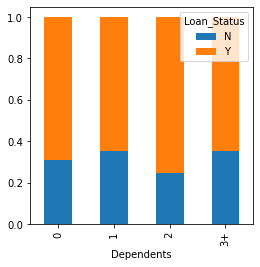

In [23]:
gender = pd.crosstab(df['Dependents'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='ApplicantIncome'>

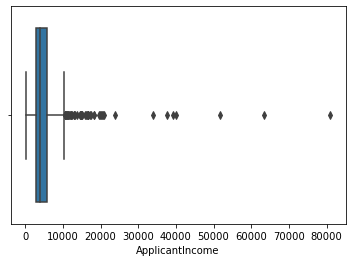

In [24]:
sns.boxplot(x=df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

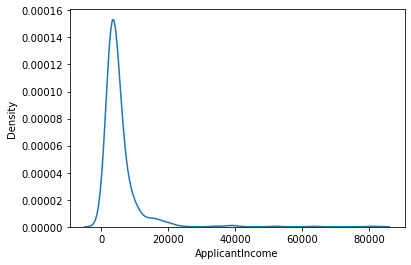

In [25]:
sns.kdeplot(x=df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

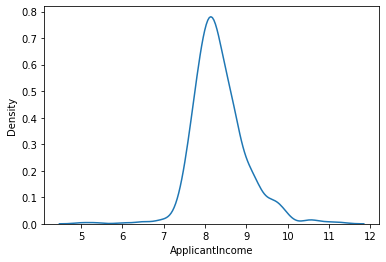

In [26]:
sns.kdeplot(x=np.log(df['ApplicantIncome']))

In [27]:
# feature engineering

In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [29]:
df['Gender'].value_counts().to_dict()

{'Male': 489, 'Female': 112}

In [30]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [31]:
df['Married'].value_counts().to_dict()

{'Yes': 398, 'No': 213}

In [32]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 62.5+ KB


In [34]:
df['Education'].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [35]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

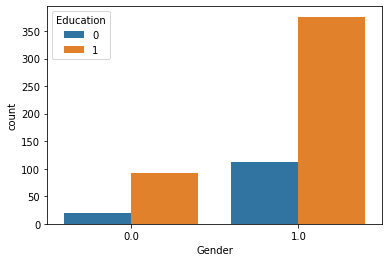

In [36]:
sns.countplot(x =df['Gender'], hue = df['Education'])

In [37]:
df['Self_Employed'].value_counts().to_dict()

{'No': 500, 'Yes': 82}

In [38]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [39]:
df['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [40]:
df['Property_Area'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)

In [41]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y


In [42]:
df['Dependents'].value_counts().to_dict()

{'0': 345, '1': 102, '2': 101, '3+': 51}

In [43]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [44]:
df['Dependents'].replace({'3+':3},inplace=True)

In [45]:
df['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [46]:
df['Dependents']=  df['Dependents'].astype(float)

In [47]:
df['Dependents'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(3), object(2)
memory usage: 62.5+ KB


In [49]:
# handling missing values

In [50]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
df.isna().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [52]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y


In [53]:
new_df= df.sort_values('Loan_Status')

In [54]:
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,0.0,0.0,0.0,1,1.0,4583,0.0,133.0,360.0,0.0,1,N
489,LP002556,1.0,0.0,0.0,1,0.0,2435,0.0,75.0,360.0,1.0,2,N
186,LP001641,1.0,1.0,1.0,1,1.0,2178,0.0,66.0,300.0,0.0,0,N
487,LP002547,1.0,1.0,1.0,1,0.0,18333,0.0,500.0,360.0,1.0,2,N
486,LP002545,1.0,0.0,2.0,1,0.0,3547,0.0,80.0,360.0,0.0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,LP001788,0.0,0.0,0.0,1,1.0,3463,0.0,122.0,360.0,NaN,2,Y
235,LP001784,1.0,1.0,1.0,1,0.0,5500,1260.0,170.0,360.0,1.0,0,Y
234,LP001778,1.0,1.0,1.0,1,0.0,3155,1779.0,140.0,360.0,1.0,1,Y
252,LP001841,1.0,0.0,0.0,0,1.0,2583,2167.0,104.0,360.0,1.0,0,Y


<AxesSubplot:>

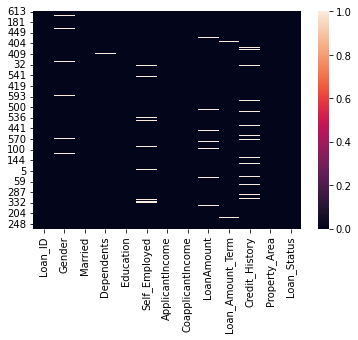

In [55]:
sns.heatmap(new_df.isna())

In [56]:
df['Gender'].mode()[0]

1.0

In [57]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [58]:
df.isna().mean()*100

Loan_ID              0.000000
Gender               0.000000
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [59]:
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [60]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [61]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [62]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [63]:
df['LoanAmount'].mean()

146.41216216216216

In [64]:
mean_N = df.groupby('Loan_Status').get_group('N')['LoanAmount'].mean()
mean_N

151.22099447513813

In [65]:
mean_Y = df.groupby('Loan_Status').get_group('Y')['LoanAmount'].mean()
mean_Y

144.29440389294405

In [66]:
df.loc[df['Loan_Status']=='N','LoanAmount'] = df.loc[df['Loan_Status'] == 'N','LoanAmount'].fillna(mean_N)

In [67]:
df.loc[df['Loan_Status']=='Y','LoanAmount'] = df.loc[df['Loan_Status'] == 'Y','LoanAmount'].fillna(mean_Y)

In [68]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,144.294404,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2,Y


In [69]:
df['Credit_History'].mode()[0]

1.0

In [70]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [71]:
df['Loan_Amount_Term'].mode()[0]

360.0

In [72]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [73]:
df['Self_Employed'].mode()[0]

0.0

In [74]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [75]:
df['Self_Employed'].mode()[0]

0.0

In [76]:
df['Dependents'].mode()[0]

0.0

In [77]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [78]:
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [79]:
df.isna().mean()*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(3), object(2)
memory usage: 62.5+ KB


<AxesSubplot:>

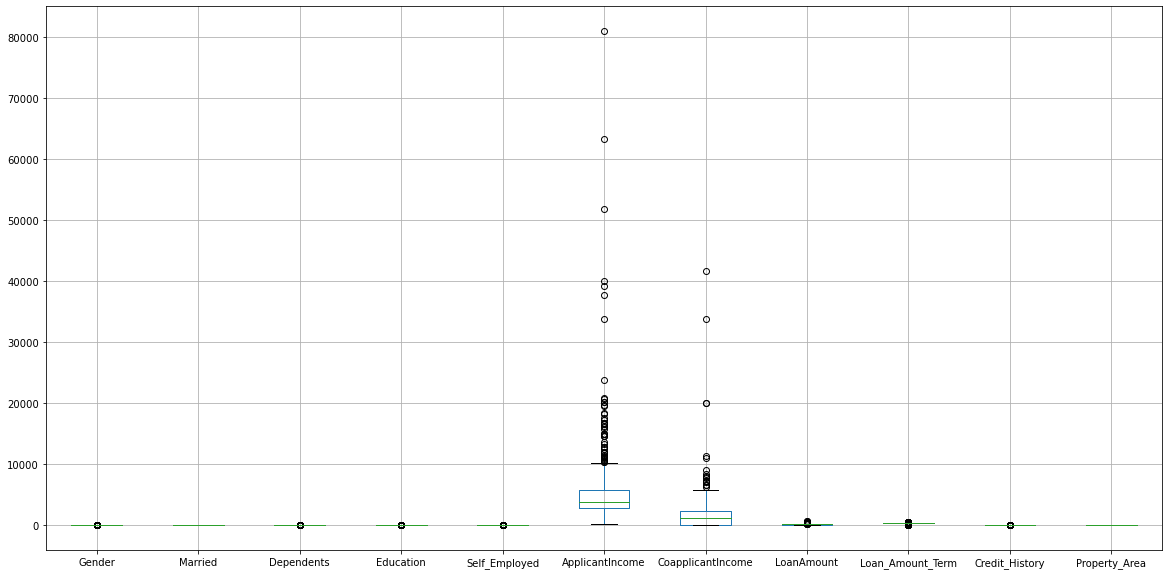

In [122]:
plt.figure(figsize=(20,10))
df.boxplot()

## detection of outliers

In [131]:
q1 = df['ApplicantIncome'].quantile(0.25)
q2 = df['ApplicantIncome'].quantile(0.50)
q3 = df['ApplicantIncome'].quantile(0.75)
print('Q1 :',q1)
print('Q2 :',q2)
print('Q3 :',q3)
print("min :",df['ApplicantIncome'].min())
print("max :",df['ApplicantIncome'].max())
print("mean :",df['ApplicantIncome'].mean())


iqr = q3 -q1
print('IQR :',iqr)

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print(upper_tail)

df['ApplicantIncome'].loc[df['ApplicantIncome']>upper_tail]



Q1 : 2877.5
Q2 : 3812.5
Q3 : 5795.0
min : 150
max : 81000
mean : 5403.459283387622
IQR : 2917.5
14547.5


115    14583
126    23803
130    20166
138    14999
146    14866
155    39999
171    51763
183    33846
185    39147
254    16250
258    14683
278    14583
284    20667
308    20233
324    15000
333    63337
369    19730
370    15759
409    81000
424    14880
443    37719
467    16692
475    16525
478    16667
487    18333
493    17263
506    20833
525    17500
534    18165
561    19484
572    16666
594    16120
Name: ApplicantIncome, dtype: int64

In [134]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q2 = df['CoapplicantIncome'].quantile(0.50)
q3 = df['CoapplicantIncome'].quantile(0.75)
print('Q1 :',q1)
print('Q2 :',q2)
print('Q3 :',q3)
print("min :",df['CoapplicantIncome'].min())
print("max :",df['CoapplicantIncome'].max())
print("mean :",df['CoapplicantIncome'].mean())


iqr = q3 -q1
print('IQR :',iqr)

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print(upper_tail)

df['CoapplicantIncome'].loc[df['CoapplicantIncome']>upper_tail]

Q1 : 0.0
Q2 : 1188.5
Q3 : 2297.25
min : 0.0
max : 41667.0
mean : 1621.245798027101
IQR : 2297.25
9189.0


9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

In [135]:
q1 = df['LoanAmount'].quantile(0.25)
q2 = df['LoanAmount'].quantile(0.50)
q3 = df['LoanAmount'].quantile(0.75)
print('Q1 :',q1)
print('Q2 :',q2)
print('Q3 :',q3)
print("min :",df['LoanAmount'].min())
print("max :",df['LoanAmount'].max())
print("mean :",df['LoanAmount'].mean())


iqr = q3 -q1
print('IQR :',iqr)

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print(upper_tail)

df['LoanAmount'].loc[df['LoanAmount']>upper_tail]

Q1 : 100.25
Q2 : 129.0
Q3 : 164.75
min : 9.0
max : 700.0
mean : 146.46037358639884
IQR : 64.5
358.25


126    370.0
130    650.0
155    600.0
171    700.0
177    495.0
278    436.0
308    480.0
325    376.0
333    490.0
369    570.0
372    380.0
409    360.0
432    405.0
487    500.0
506    480.0
523    480.0
525    400.0
561    600.0
604    496.0
Name: LoanAmount, dtype: float64

## handling outliers

In [137]:
q1 = df['ApplicantIncome'].quantile(0.25)
q2 = df['ApplicantIncome'].quantile(0.50)
q3 = df['ApplicantIncome'].quantile(0.75)
# print('Q1 :',q1)
# print('Q2 :',q2)
# print('Q3 :',q3)
# print("min :",df['ApplicantIncome'].min())
# print("max :",df['ApplicantIncome'].max())
# print("mean :",df['ApplicantIncome'].mean())


iqr = q3 -q1
print('IQR :',iqr)

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print('upper_tail',upper_tail)
print('lower_tail',lower_tail)

median = df['ApplicantIncome'].loc[df['ApplicantIncome'] <=upper_tail].median()
print("median :",median)

df['ApplicantIncome'].loc[df['ApplicantIncome']>upper_tail] = median




IQR : 2917.5
upper_tail 14547.5
lower_tail -5875.0
median : 3705.5


In [139]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q2 = df['CoapplicantIncome'].quantile(0.50)
q3 = df['CoapplicantIncome'].quantile(0.75)
# print('Q1 :',q1)
# print('Q2 :',q2)
# print('Q3 :',q3)
# print("min :",df['ApplicantIncome'].min())
# print("max :",df['ApplicantIncome'].max())
# print("mean :",df['ApplicantIncome'].mean())


iqr = q3 -q1
print('IQR :',iqr)

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print('upper_tail',upper_tail)
print('lower_tail',lower_tail)

median = df['CoapplicantIncome'].loc[df['CoapplicantIncome'] <=upper_tail].median()
print("median :",median)

df['CoapplicantIncome'].loc[df['CoapplicantIncome']>upper_tail] = median

IQR : 2297.25
upper_tail 9189.0
lower_tail -6891.75
median : 1125.5


<AxesSubplot:>

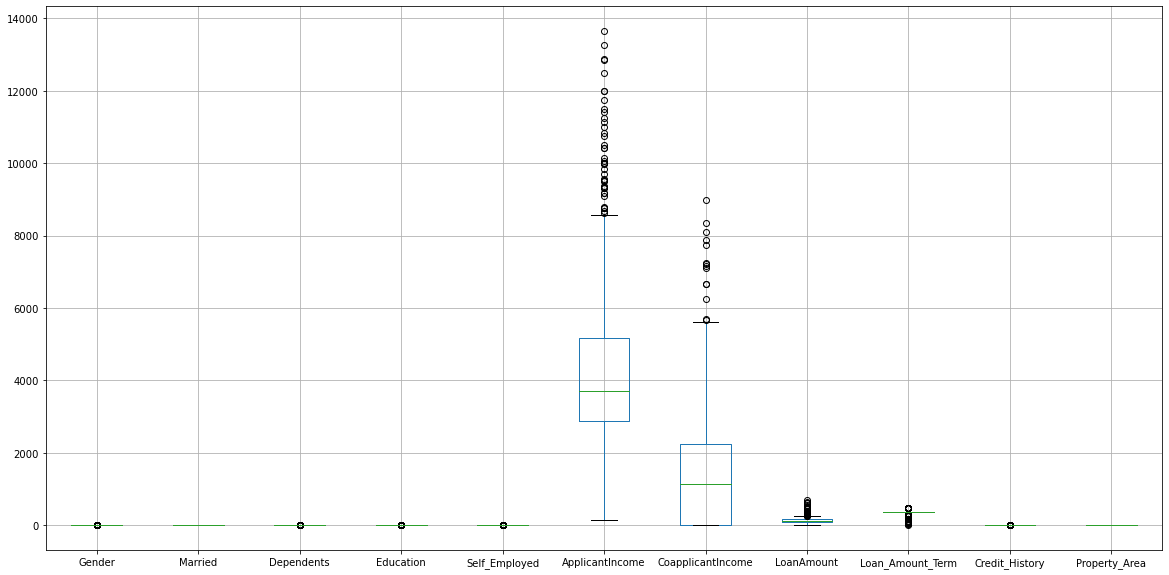

In [140]:
plt.figure(figsize=(20,10))
df.boxplot()

In [141]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,4324.167752,1407.859805,146.460374,342.410423,0.855049,1.037459
std,0.386497,0.476373,1.009623,0.413389,0.340446,2254.114465,1677.253154,84.040402,64.428629,0.352339,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3705.500000,1125.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5166.750000,2250.000000,164.750000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,13650.000000,8980.000000,700.000000,480.000000,1.000000,2.000000


In [81]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,144.294404,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2,Y


# Train test split

In [142]:
x = df.drop(['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify = y)

In [143]:
x_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [144]:
y_train.value_counts()

Y    337
N    154
Name: Loan_Status, dtype: int64

# Train Logistic regression

In [145]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

### Evaluation

In [146]:
# Testing data evaluation
y_pred_log = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_test,y_pred_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , y_pred_log)
print('classification_report : \n',clf_report)



confusion matrix :
 [[20 18]
 [ 1 84]]
Accuracy Score :  0.8455284552845529
classification_report : 
               precision    recall  f1-score   support

           N       0.95      0.53      0.68        38
           Y       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [147]:
# Training data evaluation
y_pred_train_log = log_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_train,y_pred_train_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_train,y_pred_train_log)
print('classification_report : \n',clf_report)


confusion matrix :
 [[ 63  91]
 [  7 330]]
Accuracy Score :  0.8004073319755601
classification_report : 
               precision    recall  f1-score   support

           N       0.90      0.41      0.56       154
           Y       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.69      0.72       491
weighted avg       0.82      0.80      0.77       491



### K- Nearest Neighbor

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [150]:
# Testing data evaluation
y_pred_knn = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_KNN = accuracy_score(y_test,y_pred_knn)
print("Accuracy Score : ",acc_score_KNN)

clf_report = classification_report(y_test , y_pred_knn)
print('classification_report : \n',clf_report)

# Accuracy Score :  0.6341463414634146

confusion matrix :
 [[ 4 34]
 [10 75]]
Accuracy Score :  0.6422764227642277
classification_report : 
               precision    recall  f1-score   support

           N       0.29      0.11      0.15        38
           Y       0.69      0.88      0.77        85

    accuracy                           0.64       123
   macro avg       0.49      0.49      0.46       123
weighted avg       0.56      0.64      0.58       123



In [151]:
# Training data evaluation
y_pred_train_knn = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_ = accuracy_score(y_train,y_pred_train_knn)
print("Accuracy Score : ",acc_score_)

clf_report = classification_report(y_train,y_pred_train_knn)
print('classification_report : \n',clf_report)


confusion matrix :
 [[ 54 100]
 [ 33 304]]
Accuracy Score :  0.7291242362525459
classification_report : 
               precision    recall  f1-score   support

           N       0.62      0.35      0.45       154
           Y       0.75      0.90      0.82       337

    accuracy                           0.73       491
   macro avg       0.69      0.63      0.63       491
weighted avg       0.71      0.73      0.70       491



In [152]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [153]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [154]:
std_scaler.fit_transform(x_train)

array([[-2.13998726, -1.38658539, -0.7301645 , ...,  0.26148778,
         0.40094451, -1.30634407],
       [-2.13998726, -1.38658539, -0.7301645 , ...,  0.26148778,
        -2.49411071, -0.02862507],
       [ 0.4672925 ,  0.72119612, -0.7301645 , ...,  0.26148778,
         0.40094451, -0.02862507],
       ...,
       [-2.13998726,  0.72119612, -0.7301645 , ...,  0.26148778,
         0.40094451, -1.30634407],
       [-2.13998726,  0.72119612,  0.25475519, ...,  0.26148778,
         0.40094451,  1.24909394],
       [ 0.4672925 ,  0.72119612,  2.22459457, ..., -2.53366096,
         0.40094451,  1.24909394]])

In [155]:
std_scaler.transform(x_test)

array([[-2.13998726, -1.38658539, -0.7301645 , ...,  0.26148778,
         0.40094451,  1.24909394],
       [-2.13998726, -1.38658539, -0.7301645 , ...,  0.26148778,
         0.40094451, -0.02862507],
       [ 0.4672925 ,  0.72119612, -0.7301645 , ...,  0.26148778,
        -2.49411071,  1.24909394],
       ...,
       [ 0.4672925 ,  0.72119612,  0.25475519, ...,  0.26148778,
         0.40094451, -0.02862507],
       [ 0.4672925 ,  0.72119612,  1.23967488, ..., -4.02440696,
         0.40094451,  1.24909394],
       [-2.13998726, -1.38658539,  0.25475519, ...,  0.26148778,
         0.40094451, -0.02862507]])

### Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dt_model = DecisionTreeClassifier()
# rscv_model.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [158]:
# Testing data evaluation
y_pred_dt = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_test , y_pred_dt)
print('classification_report : \n',clf_report)

# Accuracy Score :  0.6341463414634146

confusion matrix :
 [[29  9]
 [17 68]]
Accuracy Score :  0.7886178861788617
classification_report : 
               precision    recall  f1-score   support

           N       0.63      0.76      0.69        38
           Y       0.88      0.80      0.84        85

    accuracy                           0.79       123
   macro avg       0.76      0.78      0.76       123
weighted avg       0.81      0.79      0.79       123



In [159]:
# Training data evaluation
y_pred_train_dt= dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train_dt)
print("Accuracy Score : ",acc_score)

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[154   0]
 [  0 337]]
Accuracy Score :  1.0
classification_report : 
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       154
           Y       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [160]:
dt_model=DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10)
        
      
      }
rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [161]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

### Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [164]:
rf_model=rscv_model.best_estimator_
rf_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [165]:
# Testing data evaluation
y_pred_rf = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_RF = accuracy_score(y_test,y_pred_rf)
print("Accuracy Score : ",acc_score_RF)

clf_report = classification_report(y_test , y_pred_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[20 18]
 [ 1 84]]
Accuracy Score :  0.8455284552845529
classification_report : 
               precision    recall  f1-score   support

           N       0.95      0.53      0.68        38
           Y       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [166]:
# Training data evaluation
y_pred_train_rf= rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_rf = accuracy_score(y_train,y_pred_train_rf)
print("Accuracy Score : ",acc_score_rf)

clf_report = classification_report(y_train,y_pred_train_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[ 62  92]
 [  6 331]]
Accuracy Score :  0.8004073319755601
classification_report : 
               precision    recall  f1-score   support

           N       0.91      0.40      0.56       154
           Y       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491



In [173]:
rf_model = RandomForestClassifier()
hyp = hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10),
             'n_estimators':np.arange(60,100),
             
      
      }
rscv_model = RandomizedSearchCV(rf_model,hyp,random_state=52,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99])},
                   random_state=52)

In [168]:
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=6, n_estimators=81)

In [174]:
rf_model=rscv_model.best_estimator_
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=6, n_estimators=81)

In [175]:
print('acc_score_LR :',acc_score_LR,'acc_score_KNN :',acc_score_KNN,'acc_score_DT :',acc_score_DT,'acc_score_RF :',acc_score_RF,sep='\n')

acc_score_LR :
0.8004073319755601
acc_score_KNN :
0.6422764227642277
acc_score_DT :
0.7886178861788617
acc_score_RF :
0.8455284552845529


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

In [111]:
import pickle

In [112]:
pickle.dump(rf_model,open('RF_model.pkl','wb'))

In [171]:
test_points = x_test[6:7]
display(test_points)
# test_points.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
282,1.0,1.0,2.0,1,0.0,2301.0,985.799988,78.0,180.0,1.0,2


In [172]:
rf_model.predict(test_points)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import mysql.connector as sql

In [ ]:
mydb  = sql.connect(host = 'localhost',
                   user = 'root',
                   passwd='14920151',
                   use_pure=True,
                   database='loan_data')
print(mydb)
mycursor=mydb.cursor()

In [ ]:
test_points

In [115]:
insert_statement = """INSERT INTO NEW_LOAN_DATA(Gender,
Married,
Dependents,
Education,
Self_Employed,
ApplicantIncome,
CoapplicantIncome,
LoanAmount,
Loan_Amount_Term,
Credit_History,
Property_Area)

VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
                    
data = (1.0,0.0,0,1,0.00,6855,0.0,189,180,1.0,2)

try:
    mycursor.execute(insert_statement,data)
    mydb.commit()
    print('try block')
except:
    mydb.rollback()
    print('except block')

try block
